In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

from sklearn import metrics

# from sklearn.metrics import confusion_matrix

import numpy as np

import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/DSO559/main/hotelCancelations.csv')
df.head()

,booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,meal_plan_1,meal_plan_2,no_meal_plan,required_car_parking_space,room_type_1,...,Complementary,Corporate,Offline,Online,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,canceled
0,INN00027,2,0,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,65.0,0,0
1,INN00049,2,0,0,4,0,0,1,0,1,...,0,0,0,1,0,0,0,79.2,1,0
2,INN00052,2,0,2,2,0,0,0,0,1,...,0,0,0,1,0,0,0,106.0,0,1
3,INN00056,2,0,1,3,1,0,0,0,1,...,0,0,0,1,0,0,0,136.0,1,0
4,INN00064,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0.0,1,0


**Question1**

In [345]:
# How many bookings are in the data set?
booking_num = df['booking_ID'].nunique()
print(booking_num)

3000


In [346]:
# Randomly divide data into training and testing sets
# Create X and y objects:
# X = explanatory variables that we believe can help predict target variable 'canceled'
# y = target variable 'canceled'
X = df.drop('canceled', axis=1)
y = df['canceled']

In [347]:
# How many reservations were canceled in the data set?  
y.value_counts()

0    1994
1    1006
Name: canceled, dtype: int64

In [348]:
y.value_counts(normalize = True)

0    0.664667
1    0.335333
Name: canceled, dtype: float64

**Question2**

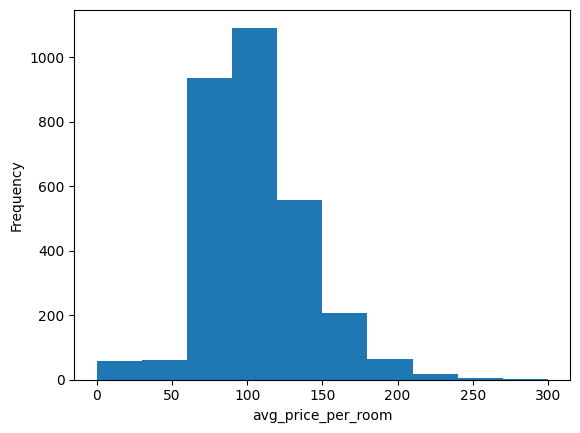

The distrubution of the average nightly price is right skewed
The median is a more suitable metric for representing the typical nightly price at this hotel


In [349]:
# show histogram of the average price per night
plt.hist(df['avg_price_per_room'])
plt.xlabel('avg_price_per_room')
plt.ylabel('Frequency')
plt.show()
print("The distrubution of the average nightly price is right skewed")
print("The median is a more suitable metric for representing the typical nightly price at this hotel")

**Question3**

In [350]:
# How many reservations have average nigthly value of zero?
(df['avg_price_per_room'] == 0).sum()

49

**Question4**

In [351]:
#Remove reservations with an average nightly rate of 0. Delete the column 'booking_ID'
df = df[df.avg_price_per_room != 0]
df.drop('booking_ID', axis=1, inplace=True)


<ipython-input-351-34f4edb6c2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('booking_ID', axis=1, inplace=True)


In [352]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,meal_plan_1,meal_plan_2,no_meal_plan,required_car_parking_space,room_type_1,room_type_2,...,Complementary,Corporate,Offline,Online,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,canceled
0,2,0,1,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,65.0,0,0
1,2,0,0,4,0,0,1,0,1,0,...,0,0,0,1,0,0,0,79.2,1,0
2,2,0,2,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,106.0,0,1
3,2,0,1,3,1,0,0,0,1,0,...,0,0,0,1,0,0,0,136.0,1,0
5,2,0,0,2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,100.0,0,1


In [353]:
# Randomly divide data into training and testing sets
# Create X and y objects:
# X = explanatory variables that we believe can help predict target variable 'canceled'
# y = target variable 'canceled'
X = df.drop('canceled', axis=1)
y = df['canceled']

In [354]:
# Randomly divide data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1) # ,stratify = y)

In [355]:
# How many reservations are in the training set?
X_train.shape[0]


2065

In [356]:
y_train.shape[0]

2065

In [357]:
# How many reservations are in the testing set?
X_test.shape[0]

886

In [358]:
y_train.value_counts(normalize = True)

0    0.666828
1    0.333172
Name: canceled, dtype: float64

In [359]:
y_test.value_counts(normalize = True)

0    0.642212
1    0.357788
Name: canceled, dtype: float64

**Question5**

In [360]:
#Using the training set, X_train and y_train, construct a decision tree
#Do not split leaves with fewer than 30 reservations into smaller leaves.
#Do not perform splitting if at least one resulting child node would contain fewer than 5 reservations.
#set random_state=1.
M = DecisionTreeClassifier(random_state=1, min_samples_split=30, min_samples_leaf=5).fit(X_train,y_train)
M.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=30, random_state=1)

In [361]:
# What is the accuracy (score) of this model ON THE TRAINING SET? Accuracy = proportion of correct predictions
M.score(X_train,y_train)

0.8731234866828087

In [362]:
#What is the accuracy on the testing set?
M.score(X_test,y_test)

0.8024830699774267

**Question6**

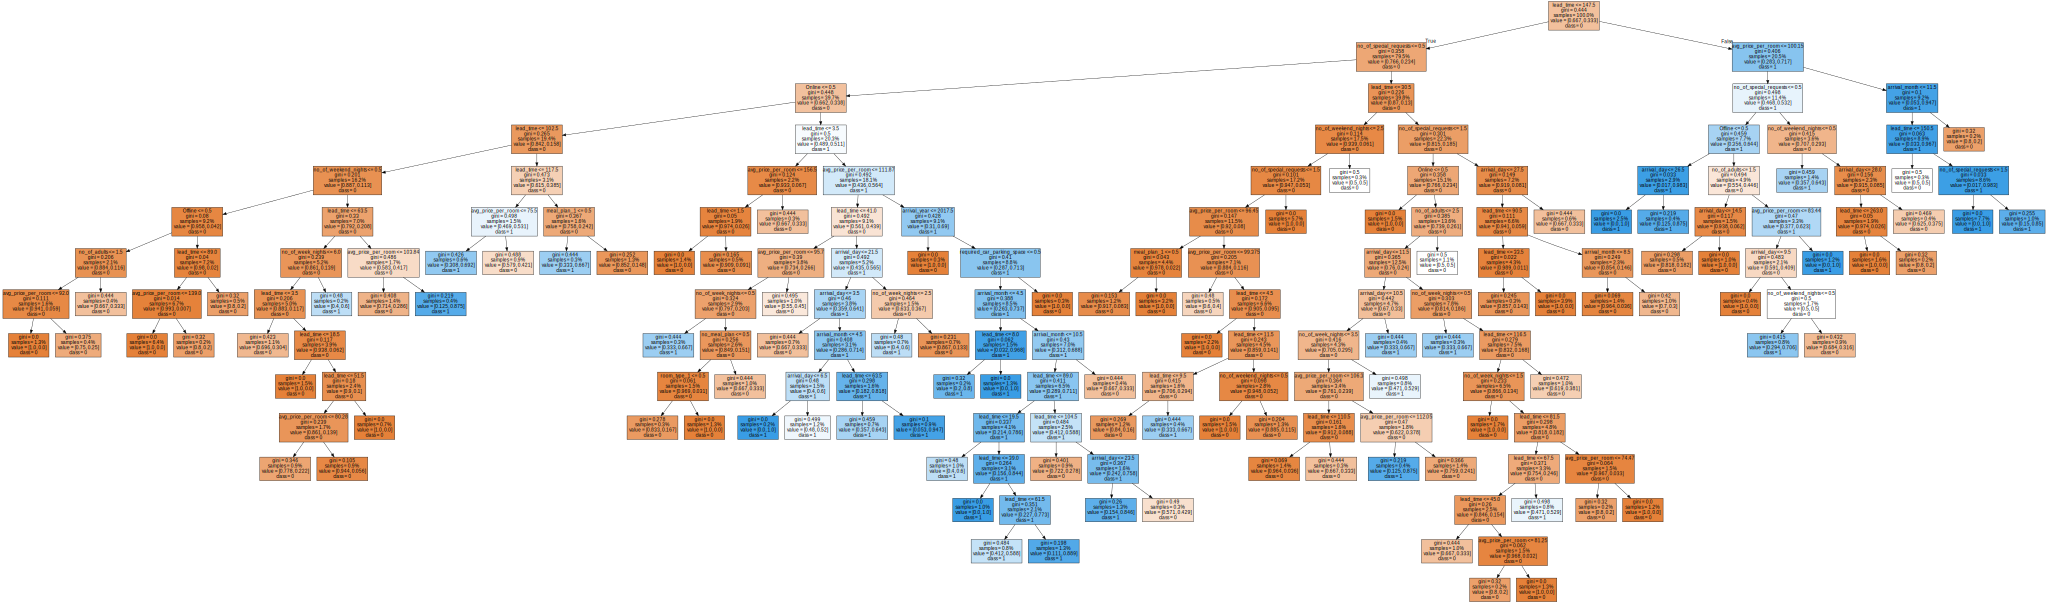

In [363]:
dot_data = export_graphviz(M,feature_names = X_train.columns,class_names=['0','1'],filled=True,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [364]:
# Create a graph of the tree you created and by looking at the tree determine the predict the probability that this booking will be canceled.
sample_x = {
    "no_of_adults": 1,
    "no_of_children": 3,
    "no_of_weekend_nights": 1,
    "no_of_week_nights": 0,
    "meal_plan_1": 1,
    "meal_plan_2": 0,
    "no_meal_plan": 0,
    "required_car_parking_space": 0,
    "room_type_1": 0,
    "room_type_2": 0,
    "room_type_3": 0,
    "room_type_4": 1,
    "room_type_5": 0,
    "room_type_6": 0,
    "lead_time": 149,
    "arrival_year": 2018,
    "arrival_month": 9,
    "arrival_day": 30,
    "Aviation": 0,
    "Complementary": 0,
    "Corporate": 0,
    "Offline": 0,
    "Online": 1,
    "repeated_guest": 0,
    "no_of_previous_cancellations": 0,
    "no_of_previous_bookings_not_canceled": 0,
    "avg_price_per_room": 149.4,
    "no_of_special_requests": 1
}
sample_x = pd.DataFrame.from_dict(sample_x, orient='index').T
ans = M.predict_proba(sample_x)
ans[0][1]

0.5

**Question7**

In [365]:
def generate_by_thresholds(data, threshold):
    data = M.predict_proba(data)
    predict = [1 if i >= threshold else 0 for i in data[:, 1]]
    return predict


threshold = 0.65
train_predict = generate_by_thresholds(X_train, threshold)
test_predict = generate_by_thresholds(X_test, threshold)

In [366]:
# confusion matrix of train
pd.crosstab(index=y_train, columns=train_predict)
# the row is actual value
# the col is predict value

col_0,0,1
canceled,,
0,1341,36
1,252,436


In [367]:
# confusion matrix of test
confusion = pd.crosstab(index=y_test, columns=test_predict)
confusion
# the row is real value
# the col is predict value

col_0,0,1
canceled,,
0,528,41
1,151,166


In [368]:
# How many reservations are canceled in the testing set?
sum(y_test)

317

In [369]:
# How many reservations are predicted to be canceled and indeed get canceled in the testing set?
confusion[1][1]

166

In [370]:
# How many reservations are predicted to be canceled but actually were not canceled in the testing set?
confusion[1][0]

41

In [371]:
# What is the proportion of not canceled reservations that our model incorrectly classifies as canceled? Round yoru answer to the second decimal place, answer format 0.xx
round(confusion[1][0] / (confusion[0][0] + confusion[1][0]), 2)

0.07

In [372]:
# What is the proportion of canceled reservations that our model incorrectly classifies as non-canceled? Round yoru answer to the second decimal place, answer format 0.xx
round(confusion[0][1] / (confusion[0][1] + confusion[1][1]), 2)

0.48

**Question8**

In [373]:
#75% of predicted cancellations will be double-booked.
#The profit per room per night is $270.
#Upgrading the customer's booking in case of a double-booked room costs $100, leading to a reduced profit of $170 per night for both rooms.

#Assumptions:
#TP (True Positives): Canceled bookings correctly identified
#FP (False Positives): Non-canceled bookings incorrectly identified as canceled
#TN (True Negatives): Non-canceled bookings correctly identified
#FN (False Negatives): Canceled bookings incorrectly identified as non-canceled

TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

#(FP * 0.25 * $270): the profit generated from FP (incorrectly predicted cancellations) that were not double-booked. 
#Since only 75% of predicted cancellations are double-booked, 25% are not double-booked. Multiply the number of false positives (FP) by 0.25 and then by the profit per room ($270).

184170.0

In [374]:
#profit without model = 270*not canceled + 0*canceled   
#Actual Profit = (Total Non-Canceled Bookings * $270) + (Total Canceled Bookings * $0)  = (TN + FP) * $270 

actual_profit = 270*(FP+TN)
actual_profit

153630

**Question9**

In [375]:
# Which of the following thresholds (cut-off probabilities) generates the largest profit?
# 0.4 0.8 0.6 0.2
thresholds = [0.2, 0.4, 0.6, 0.8]

confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.8)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix
TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

182587.5

In [376]:
confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.6)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix
TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

187320.0

In [377]:
confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.4)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix
TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

192037.5

In [378]:
confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.2)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix
TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

196057.5

**Question10**

In [379]:
# What cut-off probability was used by your coworker in creating their confusion matrix?
# 0.36 0.47 0.81 0.18 None of the above
thresholds = [0.36, 0.47, 0.81, 0.18]
for threshold in thresholds:
    print("threshold:{}".format(threshold))
    test_predict = generate_by_thresholds(X_test, threshold)
    print(pd.crosstab(index=y_test, columns=test_predict))

threshold:0.36
col_0       0    1
canceled          
0         476   93
1          88  229
threshold:0.47
col_0       0    1
canceled          
0         496   73
1         102  215
threshold:0.81
col_0       0    1
canceled          
0         542   27
1         164  153
threshold:0.18
col_0       0    1
canceled          
0         367  202
1          34  283


**Question11**

In [380]:
# Consider 100 equidistant thresholds in the interval between 0 and 1. Which threshold yields the highest accuracy on the testing set?
# What is the corresponding highest accuracy (proportion of correct classifications) (round your answer to the second decimal place, answer format 0.xx)
thresholds = np.linspace(0,1,100)
AccuracyScores = [round(metrics.accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
thresholds[AccuracyScores == max(AccuracyScores)][0]


0.4545454545454546

In [381]:
max(AccuracyScores)
#0.8025

80.25

In [382]:
# For the threshold that yields the highest accuracy, provide the estimated profit on the testing set  (round your answer to the second decimal place)
confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.45)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusion

Predicted,0,1,Total
Actual,,,
0,486,83,569
1,102,215,317
Total,588,298,886


In [383]:
# For the threshold that yields the highest accuracy, provide the estimated profit on the testing set  (round your answer to the second decimal place)
confusion = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.45)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix
TP = confusion.loc[1,1]   #predict cancel, actually canceled
FP = confusion.loc[0,1]   #predict cancel, not canceled
TN = confusion.loc[0,0]   #predict not cancel, actually not cancel
FN = confusion.loc[1,0]   #predict not cancel, canceled

profit = (TP * 0.75 * 270) + (TN * 270) + (FP * 0.75 * 170) + (FP * 0.25 * 270) + (FN * 0)
profit

190942.5